In [1]:
options(device=pdf) # turn off flashy window on each block execution
options(repr.plot.width=7, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
edges = read.csv('data/edges.csv')
users= read.csv('data/users.csv')

In [3]:
str(users)

'data.frame':	59 obs. of  4 variables:
 $ id    : int  3981 3982 3983 3984 3985 3986 3987 3988 3989 3990 ...
 $ gender: Factor w/ 3 levels "","A","B": 2 3 3 3 3 3 2 3 3 2 ...
 $ school: Factor w/ 3 levels "","A","AB": 2 1 1 1 1 2 1 1 2 1 ...
 $ locale: Factor w/ 3 levels "","A","B": 3 3 3 3 3 3 2 3 3 2 ...


In [21]:
users

,id,gender,school,locale
1,3981,A,A,B
2,3982,B,,B
3,3983,B,,B
4,3984,B,,B
5,3985,B,,B
6,3986,B,A,B
7,3987,A,,A
8,3988,B,,B
9,3989,B,A,B
10,3990,A,,A


In [29]:
#users
#x=4009
#edges[edges$V1==x | edges$V2==x,]
#sapply(users, function(user) nrow(edges[edges$V1==user$id | edges$V2==user$id,]))
mean(mapply(function(id) nrow(edges[edges$V1==id | edges$V2==id,]), users$id))

[1] 4.949153

In [31]:
table(users$locale, users$school)

   
        A AB
     3  0  0
  A  6  0  0
  B 31 17  2

In [32]:
table(users$gender, users$school)

   
        A AB
     1  1  0
  A 11  3  1
  B 28 13  1

In [33]:
library(igraph)


Attaching package: 'igraph'

The following object is masked from 'package:magrittr':

    %>%

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [34]:
g = graph.data.frame(edges, FALSE, users)

In [35]:
g

IGRAPH UN-- 59 146 -- 
+ attr: name (v/c), gender (v/c), school (v/c), locale (v/c)
+ edges (vertex names):
 [1] 4019--4026 4023--4031 4023--4030 4027--4032 3988--4021 3982--3986
 [7] 3994--3998 3998--3999 3993--3995 3982--4021 3982--4037 3997--4019
[13] 3994--4019 3992--4017 3981--3998 3997--4018 4009--4030 3994--4018
[19] 3995--4000 4000--4026 4027--4038 4031--4038 4000--4021 3986--4030
[25] 3985--4014 3994--4030 3998--4021 3994--4009 3982--4023 3998--4019
[31] 4020--4031 4009--4023 3994--3997 3981--4023 3997--4030 3997--4021
[37] 4023--4034 3993--4004 3994--3996 4000--4030 3998--4014 4004--4013
[43] 4016--4025 3990--4016 3999--4005 4004--4023 4002--4020 3998--4018
+ ... omitted several edges

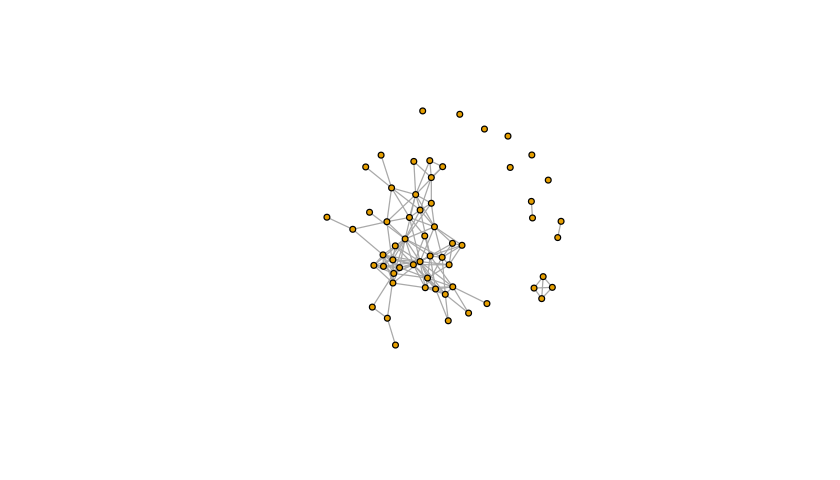

In [36]:
plot(g, vertex.size=5, vertex.label=NA)

In [41]:
table(degree(g) >= 10)


FALSE  TRUE 
   50     9 

In [43]:
V(g)$size = degree(g)/2+2

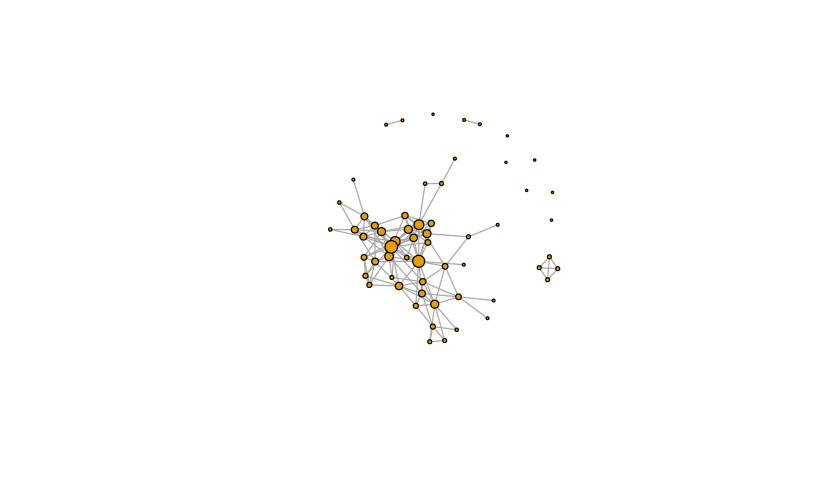

In [44]:
plot(g, vertex.label=NA)

In [46]:
summary(degree(g)/2+2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.500   3.500   4.475   6.000  11.000 

In [47]:
V(g)$color = 'black'
V(g)$color[V(g)$gender=='A'] = 'red'
V(g)$color[V(g)$gender=='B'] = 'gray'

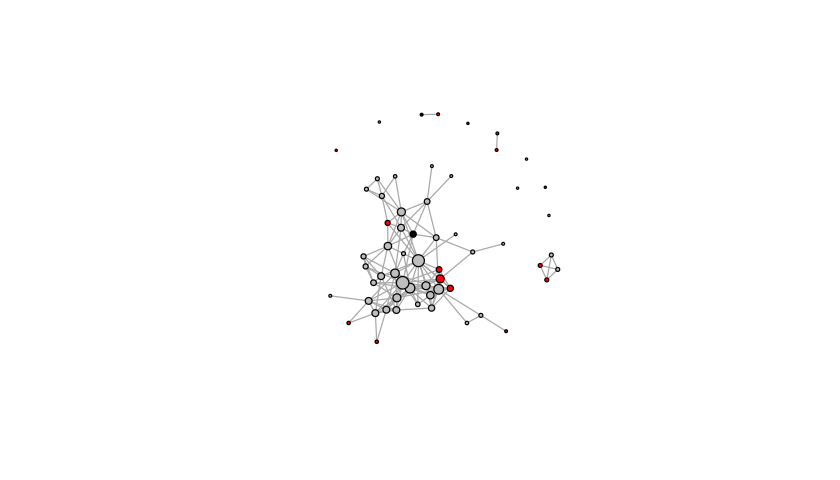

In [48]:
plot(g, vertex.label=NA)

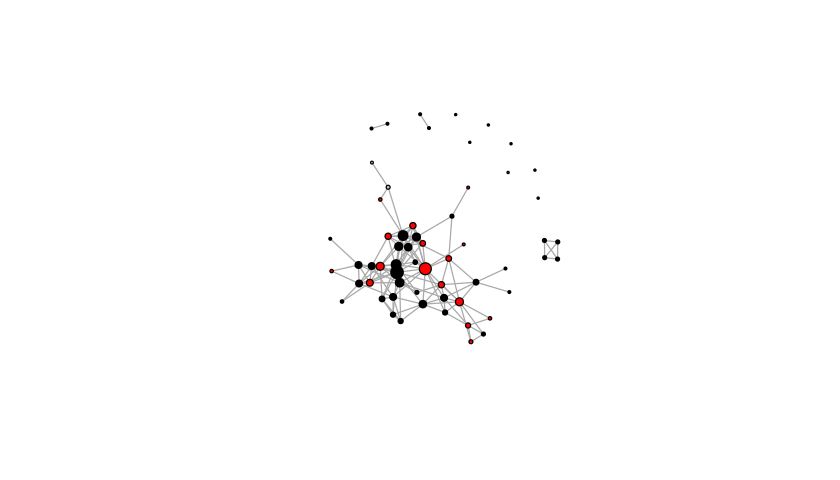

In [49]:
V(g)$color = 'black'
V(g)$color[V(g)$school=='A'] = 'red'
V(g)$color[V(g)$school=='AB'] = 'gray'
plot(g, vertex.label=NA)

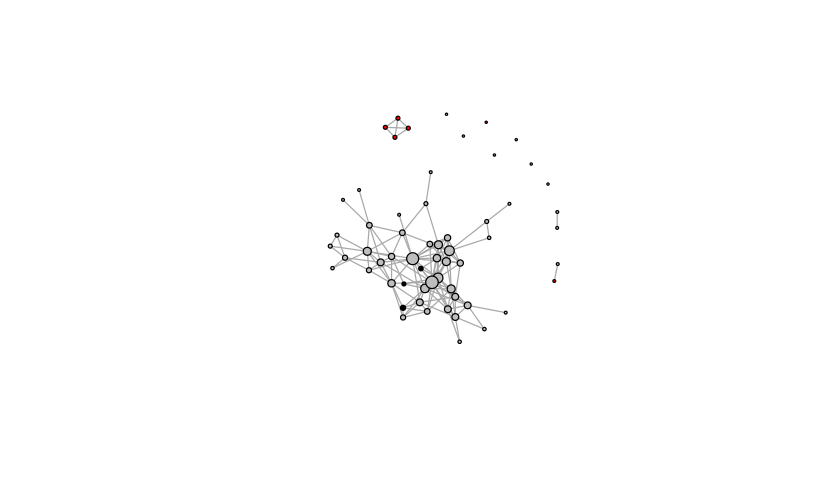

In [50]:
V(g)$color = 'black'
V(g)$color[V(g)$locale=='A'] = 'red'
V(g)$color[V(g)$locale=='B'] = 'gray'
plot(g, vertex.label=NA)

In [54]:
#library(rgl)
#rglplot(g, vertex.label=NA)

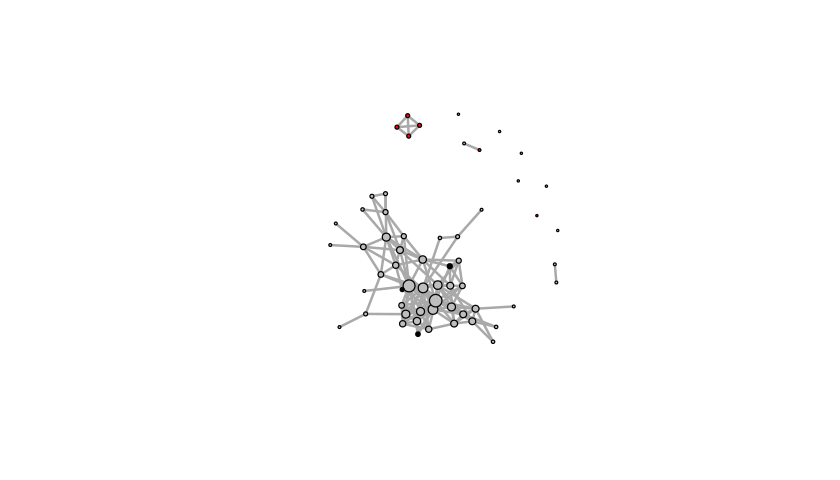

In [55]:
plot(g, edge.width=2, vertex.label=NA)